# Telecom customer churn prediction model
Our business problem is that Telecom industry faces a lot of customer churn problem, which proportionally effects the company revenue stream, A customer might leave a service due to various factors which might influence him to leave, in other instances some features ultimately result the customer to stay with the current provider.

Our aim is to build a model that trains on the information of thousands of customers and the features which will be able to predict in future whether that person might leave or decide to stay with the company. This will help the companies, as when they test it with real world data with similar features, our model will be able to predict & produce results relevant to whether the customer churns or not.

### The data set includes information about:

Customers who left – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents
This analysis focuses on the behavior of telecom customers who are more likely to leave the platform. I intend to find out the most striking behavior of customers through EDA and later on use some of the predictive analytics techniques to determine the customers who are most likely to churn.

In [48]:
# import packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
# set random seed to ensure that results are repeatable
np.random.seed(1)

**In this notebook we will be cleaning and prep the data ready for model fitting**

In [50]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
#reading the dataset

In [51]:
df.head()
#displays the top few rows of the dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [52]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Null Values
From the above analysis we have found out that there are missing values in the total charges column, so in order to proceed further with our analysis we will later impute the missing values with the mean or median of the column.

In [53]:
df.Churn.unique()

array(['No', 'Yes'], dtype=object)

### Our Target variable churn has two 2 unique values, yes for determining that the user has churned and No for determining that the user has not churned the network

In [54]:
#df.PaymentMethod.unique()

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [56]:
df.drop(['customerID'], axis=1, inplace = True)

**We dropped the customer ID column as that particular column has no significance in determining our expected results, hence we drop the column as it has no influence on our results**

In [57]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
#The totalcharges column has been converted into an float datatype as the values are continous float data

In [58]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [59]:
# create a list of these catagorical variables
category_var_list = list(df.select_dtypes(include='object').columns)
category_var_list

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

##### We get our list of categorical values, these column need to be encoded later for our modeling purposes as our models need to train and do predictions on the data

In [60]:
# explore the categorical variable values - often there are typos here that need to be fixed.
for cat in category_var_list: # generally, we want to avoid for loops and use a functional style (i.e. list comprehension)
    print(f"Category: {cat} Values: {df[cat].unique()}")

Category: gender Values: ['Female' 'Male']
Category: Partner Values: ['Yes' 'No']
Category: Dependents Values: ['No' 'Yes']
Category: PhoneService Values: ['No' 'Yes']
Category: MultipleLines Values: ['No phone service' 'No' 'Yes']
Category: InternetService Values: ['DSL' 'Fiber optic' 'No']
Category: OnlineSecurity Values: ['No' 'Yes' 'No internet service']
Category: OnlineBackup Values: ['Yes' 'No' 'No internet service']
Category: DeviceProtection Values: ['No' 'Yes' 'No internet service']
Category: TechSupport Values: ['No' 'Yes' 'No internet service']
Category: StreamingTV Values: ['No' 'Yes' 'No internet service']
Category: StreamingMovies Values: ['No' 'Yes' 'No internet service']
Category: Contract Values: ['Month-to-month' 'One year' 'Two year']
Category: PaperlessBilling Values: ['Yes' 'No']
Category: PaymentMethod Values: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Category: Churn Values: ['No' 'Yes']


In [61]:
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


#### Encode our categorical variables

Categorical variables usually have strings for their values. Many machine learning algorithms do not support string values for the input variables. Therefore, we need to replace these string values with numbers. This process is called categorical variable encoding.

In a previous step we identified few catagorical variables and found no indication of typos in the class names. Our focus is now on encoding the variables. 

We have used *Dummy Encoding* to encoding variables



In [62]:
#the dummy encoding, creates dummy columns for each category & if the value is true then it is given as 1 or else 0

In [63]:
for cat in category_var_list:
    dummy_cols = pd.get_dummies(df[cat], prefix=cat, drop_first=True)
    df = df.join(dummy_cols)
    df.drop(cat, axis=1, inplace=True)

# Print the updated dataframe
print(df)

      SeniorCitizen  tenure  MonthlyCharges  TotalCharges  gender_Male  \
0                 0       1           29.85         29.85            0   
1                 0      34           56.95       1889.50            1   
2                 0       2           53.85        108.15            1   
3                 0      45           42.30       1840.75            1   
4                 0       2           70.70        151.65            0   
...             ...     ...             ...           ...          ...   
7038              0      24           84.80       1990.50            1   
7039              0      72          103.20       7362.90            0   
7040              0      11           29.60        346.45            0   
7041              1       4           74.40        306.60            1   
7042              0      66          105.65       6844.50            1   

      Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0               1               0                 0   
1

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   int64  
 2   MonthlyCharges                         7043 non-null   float64
 3   TotalCharges                           7032 non-null   float64
 4   gender_Male                            7043 non-null   uint8  
 5   Partner_Yes                            7043 non-null   uint8  
 6   Dependents_Yes                         7043 non-null   uint8  
 7   PhoneService_Yes                       7043 non-null   uint8  
 8   MultipleLines_No phone service         7043 non-null   uint8  
 9   MultipleLines_Yes                      7043 non-null   uint8  
 10  InternetService_Fiber optic            7043 non-null   uint8  
 11  Inte

### Get Correlation of "Churn" with other variables:

<AxesSubplot:>

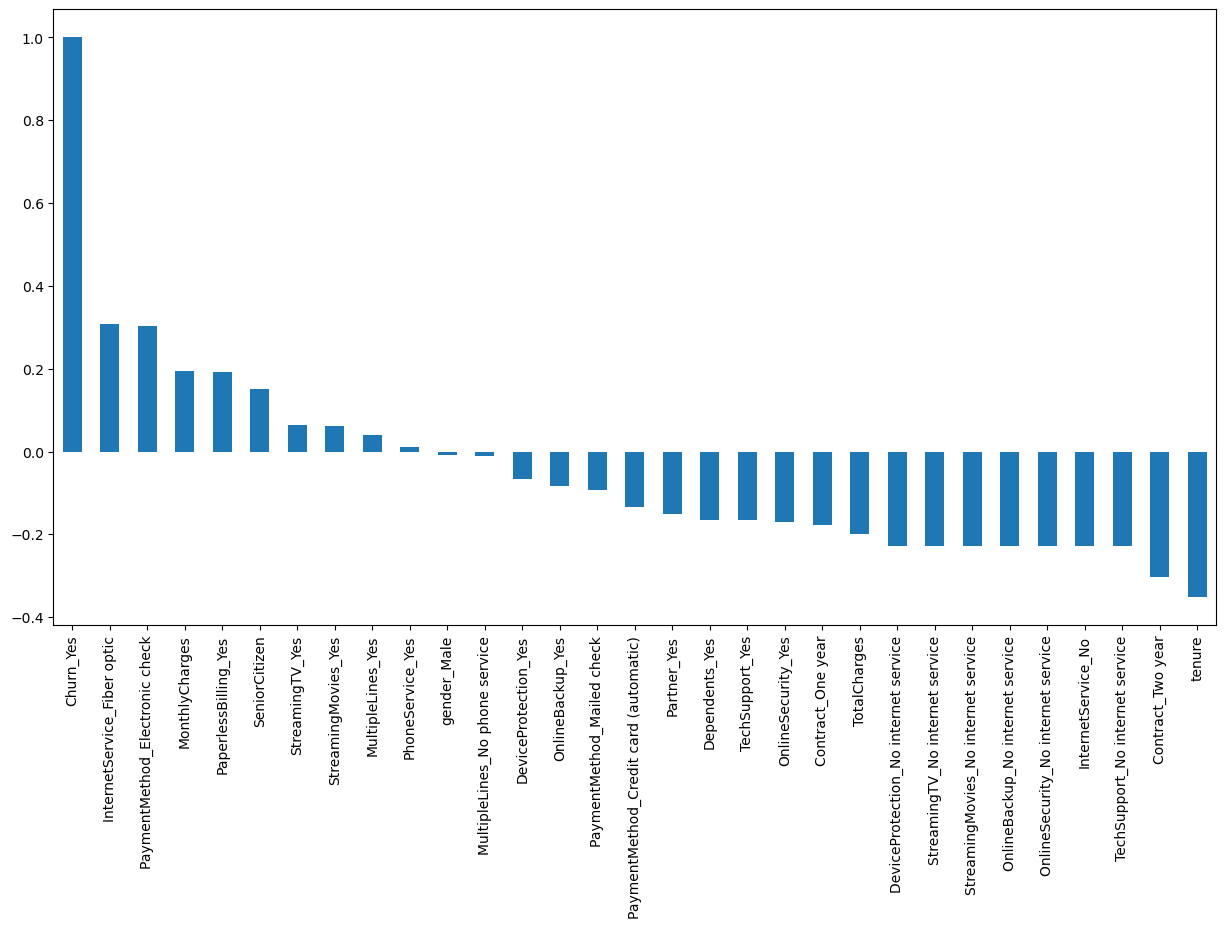

In [65]:

plt.figure(figsize=(15,8))
df.corr()['Churn_Yes'].sort_values(ascending = False).plot(kind='bar')

### Analysis
There appears to be a positive correlation between customer churn and certain factors such as streaming, absence of online security, and lack of tech support. In contrast, there is a negative correlation between churn and other factors such as longer tenure and two-year contracts.

Interestingly, services that do not rely on an internet connection, such as online backup, tech support, streaming TV, and online security, are negatively associated with churn.

In the following analysis, we will examine these correlations further before moving on to model the data and identify the most significant variables.

In [66]:
counts = df.Churn_Yes.value_counts()
counts
#Data is imbalanced

0    5174
1    1869
Name: Churn_Yes, dtype: int64

In [67]:
#saving the data frame into csv file

In [68]:
df.to_csv('adfchurn_presplit_processed.csv', index=False)

In [69]:
# split the data into validation and training set
train_df, test_df = train_test_split(df, test_size=0.3)

# to reduce repetition in later code, create variables to represent the columns
# that are our predictors and target
target = 'Churn_Yes'
predictors = list(df.columns)
predictors.remove(target)

##### In the above code, we split our data set into 70% training and 30% for testing, this helps the model train and understand the data so that when it faces incoming new data it will be able to do better predictions

### Now we will findout if there are any null values, and if so we will impute the null values with either mean/ median values of the column

In [70]:
numeric_cols_with_nas = list(train_df.isna().sum()[train_df.isna().sum() > 0].index)
numeric_cols_with_nas

['TotalCharges']

In [71]:
imputer = SimpleImputer(strategy="mean")

train_df[numeric_cols_with_nas] = imputer.fit_transform(train_df[numeric_cols_with_nas])
test_df[numeric_cols_with_nas] = imputer.transform(test_df[numeric_cols_with_nas])

fit_transform() is used to both fit and transform the data. The method computes the necessary parameters for the transformation based on the data and then applies the transformation to the data. In other words, it fits the transformation to the data and then transforms it in one step.
transform() is used to transform the data based on parameters that have been computed in a previous step. It applies the transformation to the data without changing the parameters.

We used the mean of the column to fill in the missing data in the respective column,the mean is a good choice to impute missing values. The mean is the sum of all values divided by the number of values, and it represents the average of the data. In a symmetric distribution, the mean is located at the center of the distribution and is a good representation of the typical value.

In [72]:
#the columns that we are going to standardize are seniorcitizens, tenure, monthycharges, totalcharges as the values are in different scales

In [73]:
# create a standard scaler and fit it to the training set of predictors
scaler = preprocessing.StandardScaler()
cols_to_stdize = ['SeniorCitizen', 'tenure', 'MonthlyCharges','TotalCharges']                
               
# Transform the predictors of training and validation sets
train_df[cols_to_stdize] = scaler.fit_transform(train_df[cols_to_stdize]) # train_predictors is not a numpy array


test_df[cols_to_stdize] = scaler.transform(test_df[cols_to_stdize]) # validation_target is now a series object


We apply standardization for our columns so that all the values are in similar scale and easy to analyse when they are in similar scale when compared to different measure which makes it harder for the models to train.

### Adressing the data imbalance in target

In [74]:
train_df.Churn_Yes.value_counts()

0    3589
1    1341
Name: Churn_Yes, dtype: int64

*The data is slightly imbalanced as it is not even 50:50, so we will be undersampling the data so that the data balance is maintained, the balanced dataset will be trained and the models will be able to do better predictions*

In [75]:
# separate features and labels
Xd = train_df.drop('Churn_Yes', axis=1)
yd = train_df['Churn_Yes']
from imblearn.under_sampling import RandomUnderSampler

# instantiate the RandomUnderSampler object
rus = RandomUnderSampler()

# fit and apply RandomUnderSampler on the data
X_resampled, y_resampled = rus.fit_resample(Xd, yd)

# print the new class distribution
print(pd.Series(y_resampled).value_counts())

0    1341
1    1341
Name: Churn_Yes, dtype: int64


We have taken the train data, then we had done the resampling technique and stored the new data in X_resampled,y_resampled, later we store
**the balanced dataset is now added to a new dataframe, and we will be proceeding futher with the new dataframe since the weights of targets are evenly distributed**

In [76]:
df2=X_resampled
df2['Churn_Yes']=y_resampled
df2

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,-0.43979,1.213086,-0.333322,0.505634,0,1,1,1,0,0,...,0,0,0,1,0,0,1,0,0,0
1,-0.43979,0.602169,0.320629,0.543081,0,0,0,1,0,0,...,1,0,1,0,1,0,0,0,1,0
2,-0.43979,-0.660394,0.219383,-0.469998,1,0,0,1,0,1,...,0,0,1,0,0,1,0,0,0,0
3,-0.43979,1.498180,0.586193,1.444546,0,0,0,1,0,0,...,1,0,1,0,1,1,1,0,0,0
4,-0.43979,0.561441,0.999477,0.945390,1,0,0,1,0,1,...,1,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2677,-0.43979,-1.026944,0.677481,-0.738696,1,0,0,1,0,1,...,0,0,1,0,0,1,0,0,1,1
2678,-0.43979,-1.189855,1.200310,-0.858862,1,0,0,1,0,1,...,1,0,1,0,0,1,0,1,0,1
2679,2.27381,-0.945488,1.185372,-0.599377,1,0,0,1,0,1,...,1,0,1,0,0,1,0,1,0,1
2680,-0.43979,-0.171660,1.357989,0.309097,1,0,0,1,0,1,...,1,0,1,0,0,1,0,1,0,1


In [77]:
df2.Churn_Yes.value_counts()

0    1341
1    1341
Name: Churn_Yes, dtype: int64

### Saving the preprocessed data into respective csv files

In [78]:
train_X = df2[predictors] #Using the new resampled dataframe
train_y = df2[target] # train_target is now a series objecttrain_df.to_csv('df_train_df_churn.csv', index=False)
test_X = test_df[predictors]
test_y = test_df[target] # validation_target is now a series object

In [79]:

train_df.to_csv('df_train_df_churn.csv', index=False)
train_X.to_csv('df_train_X_churn.csv', index=False)
train_y.to_csv('df_train_y_churn.csv', index=False)
test_df.to_csv('df_test_df_churn.csv', index=False)
test_X.to_csv('df_test_X_churn.csv', index=False)
test_y.to_csv('df_test_y_churn.csv', index=False)

### These csv files have the respective train, test data information and later be used as they will be accessed by our model fitting notebook for futher analysis, by this we end our data cleansing part and further move to the analysis and prediction part.